In [121]:
import numpy as np 
import cv2,joblib
import Sliding as sd
from imutils.object_detection import non_max_suppression
import imutils
from skimage.feature import hog
from skimage import color, data, exposure
from skimage.transform import pyramid_gaussian
import matplotlib.pyplot as plt
import glob
import os

In [122]:
# import matplotlib.pyplot as plt
# from skimage.feature import hog
# from skimage import exposure
# from skimage.io import imread
# from skimage.transform import resize
# import cv2
# import os

# # Path to the input image
# image_path = 'test/frame_00000.jpg'

# # Load the image
# image = cv2.imread(image_path)

# # reading the image
# # img = imread('test/frame_00000.jpg')
# # resized_img = resize(img, (64*4, 128*4))
# # resized_img = resize(img, (64, 128))

# # Perform HOG feature extraction
# fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
#                     cells_per_block=(3, 3), visualize=True, channel_axis=-1)
# # fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
# #                     cells_per_block=(1, 1), visualize=True, channel_axis=-1)

# # Specify the output directory
# output_directory = 'output_images'

# # Create the output directory if it doesn't exist
# os.makedirs(output_directory, exist_ok=True)

# # Display and save the input image
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# ax1.axis('off')
# ax1.imshow(image, cmap=plt.cm.gray)
# ax1.set_title('Input image')

# # Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# ax2.axis('off')
# ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
# ax2.set_title('HOG')

# # # Save the output images in the specified directory
# input_image_filename = os.path.join(output_directory, 'input_image.png')
# hog_image_filename = os.path.join(output_directory, 'hog_image.png')

# plt.savefig(input_image_filename)
# plt.savefig(hog_image_filename)

# # Show the plot
# plt.show()
# # Display the length of the HOG feature vector
# print(f"Length of the HOG feature vector: {len(fd)}")


In [123]:
# import matplotlib.pyplot as plt
# from skimage.feature import hog
# from skimage import exposure
# from skimage.io import imread
# from skimage.transform import resize
# import numpy as np
# import cv2
# import os

# # Path to the input image
# image_path = 'test/test/frame_02902.JPG'

# # Load the image
# image = imread(image_path)
# resized_img = resize(image, (64*4, 128*4))

# # Perform HOG feature extraction
# fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
#                     cells_per_block=(3, 3), visualize=True, channel_axis=-1)

# # Specify the output directory
# output_directory = 'output_images'

# # Create the output directory if it doesn't exist
# os.makedirs(output_directory, exist_ok=True)

# # Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# # Sharpen the HOG image using a kernel
# kernel = np.array([[0, -5, 0], [-1, -3, -1], [0, -5, 0]])
# sharpened_hog_image = cv2.filter2D(hog_image_rescaled, -1, kernel)

# # Save individual images
# input_image_filename = os.path.join(output_directory, 'input_image.png')
# hog_image_filename = os.path.join(output_directory, 'hog_image.png')
# sharpened_hog_image_filename = os.path.join(output_directory, 'sharpened_hog_image.png')

# plt.imsave(input_image_filename, resized_img)
# plt.imsave(hog_image_filename, hog_image_rescaled, cmap=plt.cm.gray)
# plt.imsave(sharpened_hog_image_filename, sharpened_hog_image, cmap=plt.cm.gray)

# # Display and save the input, HOG, and sharpened HOG images
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

# ax1.axis('off')
# ax1.imshow(resized_img, cmap=plt.cm.gray)
# ax1.set_title('Input image')

# ax2.axis('off')
# ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
# ax2.set_title('HOG')

# ax3.axis('off')
# ax3.imshow(sharpened_hog_image, cmap=plt.cm.gray)
# ax3.set_title('Sharpened HOG')

# # Save the figure containing all three images
# comparison_filename = os.path.join(output_directory, 'comparison.png')
# plt.tight_layout()
# plt.savefig(comparison_filename)

# # Show the plot
# plt.show()

# # Display the length of the HOG feature vector
# print(f"Length of the HOG feature vector: {len(fd)}")


In [124]:
# # Load the image
# image_path = 'output/frame_03007.jpg'
# image = cv2.imread(image_path)
# image = cv2.resize(image, (400, 256))
# size = (64, 128)
# step_size = (9, 9)
# downscale = 1.25
# detections = []
# scale = 0
# model = joblib.load('models/model_crop.dat')

# # Print the weights and bias of the SVM model
# weights = model.coef_
# bias = model.intercept_
# print("SVM Weights (w):", weights)
# print("SVM Bias (b):", bias)

# # Function to calculate decision score manually
# def calculate_decision_score(features, weights, bias):
#     return np.dot(features, weights.T) + bias

# # Iterasi melalui pyramid_gaussian
# for im_scaled in pyramid_gaussian(image, downscale=downscale):
#     if im_scaled.shape[0] < size[1] or im_scaled.shape[1] < size[0]:
#         break
#     # Iterasi melalui sliding window
#     for (x, y, window) in sd.sliding_window(im_scaled, size, step_size):
#         if window.shape[0] != size[1] or window.shape[1] != size[0]:
#             continue
#         window = color.rgb2gray(window)
        
#         # Ekstraksi fitur HOG
#         fd = hog(window, orientations=9, pixels_per_cell=(8, 8),
#                  visualize=False, cells_per_block=(3, 3))
        
#         # Reshape features for prediction
#         fd = fd.reshape(1, -1)
        
#         # Print the HOG features as vector
#         print("HOG Features Vector for window at ({}, {}):".format(x, y))
#         print(fd[0])
        
#         # Prediksi menggunakan model SVM
#         pred = model.predict(fd)
        
#         # Hitung decision function score
#         decision_score = model.decision_function(fd)
        
#         # Hitung decision score secara manual
        # manual_decision_score = calculate_decision_score(fd, weights, bias)
        
#         # Print decision score for debugging
#         print("Decision Score for window at ({}, {}): {}".format(x, y, decision_score))
#         print("Manual Decision Score Calculation for window at ({}, {}): {}".format(x, y, manual_decision_score))
        
#         if pred == 1 and decision_score > 0.5:
#             detections.append((int(x * (downscale ** scale)), int(y * (downscale ** scale)),
#                                decision_score, int(size[0] * (downscale ** scale)),
#                                int(size[1] * (downscale ** scale))))
                
#     scale += 1


In [125]:
# # Load the image
# image_path = 'output/frame_01830.jpg'
# image = cv2.imread(image_path)
# image = cv2.resize(image, (400, 256))
# size = (64, 128)
# step_size = (9, 9)
# downscale = 1.25
# detections = []
# scale = 0
# model = joblib.load('models/64x128_svc_rbf.dat')

# for im_scaled in pyramid_gaussian(image, downscale=downscale):
#     if im_scaled.shape[0] < size[1] or im_scaled.shape[1] < size[0]:
#         break
#     for (x, y, window) in sd.sliding_window(im_scaled, size, step_size):
#         if window.shape[0] != size[1] or window.shape[1] != size[0]:
#             continue
#         window = color.rgb2gray(window)
            
#         fd = hog(window, orientations=9, pixels_per_cell=(8, 8),
#                  visualize=False, cells_per_block=(3, 3))
        
#         # Reshape features for prediction
#         fd = fd.reshape(1, -1)
        
#         # Predict using the model
#         pred = model.predict(fd)
        
#         # Calculate decision function score
#         decision_score = model.decision_function(fd)
        
#         # Print decision score for debugging
#         print("Decision Score for window at ({}, {}): {}".format(x, y, decision_score))
        
#         # Determine if detection meets threshold
#         if pred == 1 and decision_score > 0.5:
#             detections.append((int(x * (downscale ** scale)), int(y * (downscale ** scale)),
#                                decision_score, int(size[0] * (downscale ** scale)),
#                                int(size[1] * (downscale ** scale))))
                
#     scale += 1

In [126]:
# Load the image
image_path = 'output/frame_01830.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (400, 256))
# size = (64, 128)
# size = (48, 112)
size = (56, 120)
step_size = (9, 9)
downscale = 1.25
detections = []
scale = 0
model = joblib.load('models/56x120_svc_rbf.dat')

for im_scaled in pyramid_gaussian(image, downscale=downscale):
    if im_scaled.shape[0] < size[1] or im_scaled.shape[1] < size[0]:
        break
    for (x, y, window) in sd.sliding_window(im_scaled, size, step_size):
        if window.shape[0] != size[1] or window.shape[1] != size[0]:
            continue
        window = color.rgb2gray(window)
            
        fd = hog(window, orientations=9, pixels_per_cell=(8, 8),
                 visualize=False, cells_per_block=(3, 3))
        
        # Reshape features for prediction
        fd = fd.reshape(1, -1)
        
        # Predict using the model
        pred = model.predict(fd)
        
        # Calculate decision function score
        decision_score = model.decision_function(fd)
        
        # Print decision score for debugging
        print("Decision Score for window at ({}, {}): {}".format(x, y, decision_score))
        
        # Determine if detection meets threshold
        if pred == 1 and decision_score > 0.5:
            detections.append((int(x * (downscale ** scale)), int(y * (downscale ** scale)),
                               decision_score, int(size[0] * (downscale ** scale)),
                               int(size[1] * (downscale ** scale))))
                
    scale += 1

Decision Score for window at (0, 0): [-0.7994644]
Decision Score for window at (9, 0): [-0.72489515]
Decision Score for window at (18, 0): [-0.79750733]
Decision Score for window at (27, 0): [-0.96975859]
Decision Score for window at (36, 0): [-0.8064419]
Decision Score for window at (45, 0): [-0.60899607]
Decision Score for window at (54, 0): [-0.59942671]
Decision Score for window at (63, 0): [-0.71950056]
Decision Score for window at (72, 0): [-1.31287566]
Decision Score for window at (81, 0): [-0.9476049]
Decision Score for window at (90, 0): [-1.05234238]
Decision Score for window at (99, 0): [-1.12904241]
Decision Score for window at (108, 0): [-1.0597829]
Decision Score for window at (117, 0): [-0.79967733]
Decision Score for window at (126, 0): [-1.06171086]
Decision Score for window at (135, 0): [-1.20401741]
Decision Score for window at (144, 0): [-1.45429903]
Decision Score for window at (153, 0): [-1.49529683]
Decision Score for window at (162, 0): [-1.44461254]
Decision Sc

Clone the image to draw rectangles

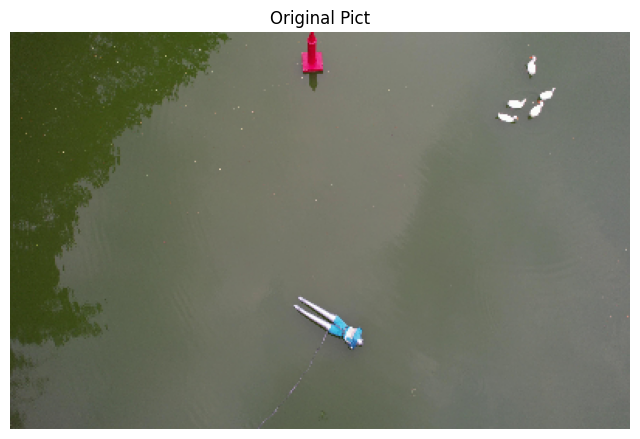

In [127]:
# cv2.imshow('Human Detection w/o NMS', clone)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Pict')
plt.axis('off')
plt.show()

In [128]:
rects = np.array([[x, y, x + w, y + h, cfd[0]] for (x, y, cfd, w, h) in detections])
sc = [score[0] for (x, y, score, w, h) in detections]
print ("sc: ", sorted(sc))
sc = np.array(sc)

sc:  [0.5019524986420125, 0.513431147588175, 0.5184110890793365, 0.5212719306768645, 0.5246500879507798, 0.5256588067475971, 0.5311329279015236, 0.5414543178704343, 0.5423105878577317, 0.5482197124132362, 0.5496793286254196, 0.5497641725510669, 0.5532101339121824, 0.5624889115838978, 0.5681368901669366, 0.6111565622249606, 0.6145080982565925, 0.6233403156411826, 0.6261967819710997, 0.6365624488441437, 0.6377347664298659, 0.6377960759931799, 0.6395679215084834, 0.6418970748645461, 0.6450961750714131, 0.6511539342524489, 0.6533478921179384, 0.6554776188525356, 0.6699005862394467, 0.6782463765882848, 0.68580272904399, 0.6948406150736449, 0.69997332028795, 0.7095595476975369, 0.7230511410535596, 0.7266831206996495, 0.7271431129355219, 0.7376049043383139, 0.7462572576684114, 0.7474311277628246, 0.7484890886367624, 0.7492887746297404, 0.7579969053788957, 0.7669077353668194, 0.7740530931705311, 0.777871139091238, 0.8047508956920517, 0.8128063521463142, 0.8129501692253741, 0.8272026224394166, 

In [129]:
clone = image.copy()

In [130]:
# Modifikasi loop untuk menampilkan score pada bounding box
for (x, y, cfd, w, h) in detections:
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)
    score_text = f'{cfd[0]:.2f}'  # Mengubah confidence menjadi string dengan format 2 angka desimal
    cv2.putText(clone, score_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(clone, 'Victims', (x - 2, y - 2), 1, 0.75, (121, 0, 34), 1)

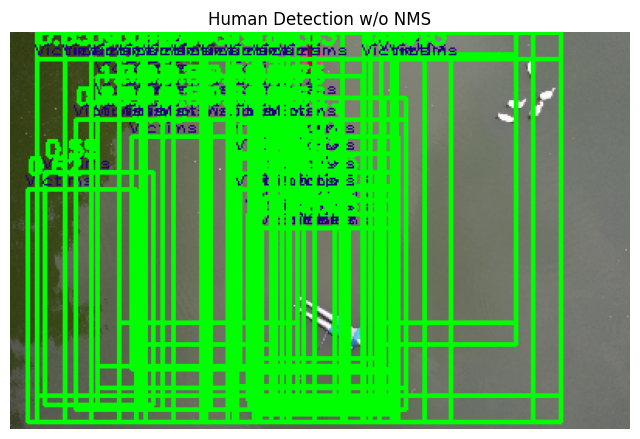

In [131]:
# cv2.imshow('Human Detection w/o NMS', clone)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
plt.title('Human Detection w/o NMS')
plt.axis('off')
plt.show()

Draw bounding boxes for all detections without NMS

Total bounding boxes: 87


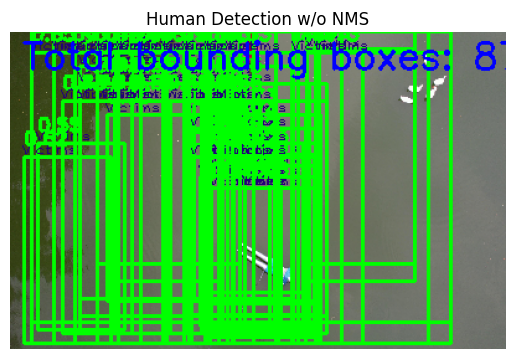

In [132]:
total_detections = len(detections)
print(f'Total bounding boxes: {total_detections}')

text = f'Total bounding boxes: {total_detections}'
cv2.putText(clone, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
plt.title('Human Detection w/o NMS')
plt.axis('off')
plt.show()


Apply NMS to reduce duplicate detections

In [133]:



# rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in detections])
# sc = [score[0] for (x, y, score, w, h) in detections]
# sc = np.array(sc)
# pick = non_max_suppression(rects, probs=sc, overlapThresh=0.3)
# # pick = cv2.dnn.NMSBoxes(rects, sc, 0.3, 0.5)

In [134]:
rects = np.array([[x, y, x + w, y + h, cfd[0]] for (x, y, cfd, w, h) in detections])
sc = [score[0] for (x, y, score, w, h) in detections]
print ("sc: ", sorted(sc))
sc = np.array(sc)
pick = non_max_suppression(rects, probs=sc, overlapThresh=0.01)

sc:  [0.5019524986420125, 0.513431147588175, 0.5184110890793365, 0.5212719306768645, 0.5246500879507798, 0.5256588067475971, 0.5311329279015236, 0.5414543178704343, 0.5423105878577317, 0.5482197124132362, 0.5496793286254196, 0.5497641725510669, 0.5532101339121824, 0.5624889115838978, 0.5681368901669366, 0.6111565622249606, 0.6145080982565925, 0.6233403156411826, 0.6261967819710997, 0.6365624488441437, 0.6377347664298659, 0.6377960759931799, 0.6395679215084834, 0.6418970748645461, 0.6450961750714131, 0.6511539342524489, 0.6533478921179384, 0.6554776188525356, 0.6699005862394467, 0.6782463765882848, 0.68580272904399, 0.6948406150736449, 0.69997332028795, 0.7095595476975369, 0.7230511410535596, 0.7266831206996495, 0.7271431129355219, 0.7376049043383139, 0.7462572576684114, 0.7474311277628246, 0.7484890886367624, 0.7492887746297404, 0.7579969053788957, 0.7669077353668194, 0.7740530931705311, 0.777871139091238, 0.8047508956920517, 0.8128063521463142, 0.8129501692253741, 0.8272026224394166, 

Clone the image again to draw rectangles with NMS applied

In [135]:
# clone = image.copy()
# for (x1, y1, x2, y2) in pick:
#     cv2.rectangle(clone, (x1, y1), (x2, y2), (0, 255, 0), 2)
#     cv2.putText(clone, 'Human', (x1 - 2, y1 - 2), 1, 0.75, (121, 000, 34), 1)

In [136]:
clone = image.copy()
for (x1, y1, x2, y2, cfd) in pick:
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
    cv2.rectangle(clone, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(clone, str("Victims {:.2f} ".format(cfd)), (x1 + 5, y1 + 10), 1, 0.75, (0, 0, 255), 1)


sc:  [0.5019524986420125, 0.513431147588175, 0.5184110890793365, 0.5212719306768645, 0.5246500879507798, 0.5256588067475971, 0.5311329279015236, 0.5414543178704343, 0.5423105878577317, 0.5482197124132362, 0.5496793286254196, 0.5497641725510669, 0.5532101339121824, 0.5624889115838978, 0.5681368901669366, 0.6111565622249606, 0.6145080982565925, 0.6233403156411826, 0.6261967819710997, 0.6365624488441437, 0.6377347664298659, 0.6377960759931799, 0.6395679215084834, 0.6418970748645461, 0.6450961750714131, 0.6511539342524489, 0.6533478921179384, 0.6554776188525356, 0.6699005862394467, 0.6782463765882848, 0.68580272904399, 0.6948406150736449, 0.69997332028795, 0.7095595476975369, 0.7230511410535596, 0.7266831206996495, 0.7271431129355219, 0.7376049043383139, 0.7462572576684114, 0.7474311277628246, 0.7484890886367624, 0.7492887746297404, 0.7579969053788957, 0.7669077353668194, 0.7740530931705311, 0.777871139091238, 0.8047508956920517, 0.8128063521463142, 0.8129501692253741, 0.8272026224394166, 

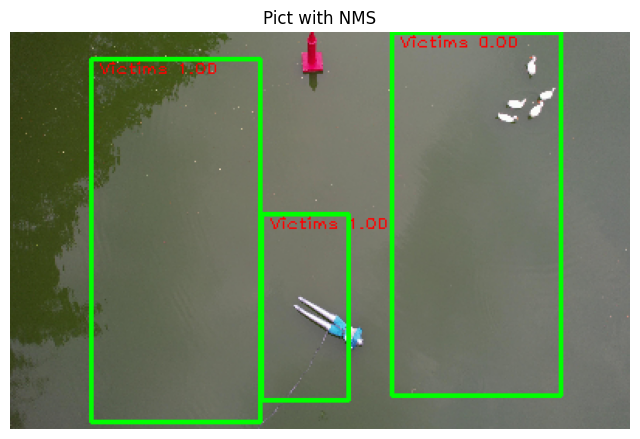

In [137]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
print ("sc: ", sorted(sc))
plt.title('Pict with NMS')
plt.axis('off')
plt.show()

In [138]:
total_detections_nms = len(pick)
print(f'Total bounding boxes: {total_detections_nms}')

Total bounding boxes: 3


In [139]:
 # # Save the images with detections in the output folder
 #    file_name = os.path.basename(image_file)
 #    output_file_without_nms = os.path.join(output_folder, 'without_nms_' + file_name)
 #    output_file_with_nms = os.path.join(output_folder, 'with_nms_' + file_name)

 #    cv2.imwrite(output_file_without_nms, clone)
 #    cv2.imwrite(output_file_with_nms, clone_with_nms)

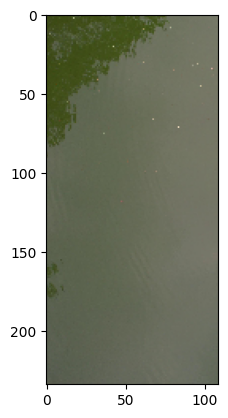

In [140]:
# Mencari indeks bounding box dengan nilai sc tertinggi
idx = np.argmax(sc)

# Mendapatkan koordinat bounding box dengan nilai sc tertinggi
(x, y, _, w, h) = detections[idx]

# Mengambil bounding box dengan nilai sc tertinggi dari gambar asli
crop_img = image[y:y+h, x:x+w]

# Menampilkan gambar yang di-crop
# cv2.imshow("Cropped Image", crop_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Tampilkan gambar yang di-crop
# plt.imshow(crop_img)
# plt.axis('off')  # Matikan sumbu
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.show()

In [141]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS

def get_geotagging(image):
    try:
        exif_data = image._getexif()
        if exif_data is not None:
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, tag)
                if tag_name == "GPSInfo":
                    return {GPSTAGS.get(t, t): v for t, v in value.items()}
    except Exception as e:
        print(f"Error extracting geotagging information: {e}")
    return None

def extract_longitude_latitude(image):
    geotags = get_geotagging(image)
    if geotags is not None:
        latitude = geotags.get('GPSLatitude')
        longitude = geotags.get('GPSLongitude')
        return latitude, longitude
    return None, None

In [142]:
# Assuming 'image' is your PIL Image object
image = cv2.imread(image_path)
image = Image.open(image_path)

# Extract basic metadata
info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
}

# Extract longitude and latitude
latitude, longitude = extract_longitude_latitude(image)
info_dict["Latitude"] = latitude
info_dict["Longitude"] = longitude

# Print all metadata
for label, value in info_dict.items():
    print(f"{label:25}: {value}")

Filename                 : output/frame_01830.jpg
Image Size               : (3840, 2160)
Image Height             : 2160
Image Width              : 3840
Image Format             : JPEG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1
Latitude                 : (7.0, 17.0, 10.46)
Longitude                : (112.0, 47.0, 46.04)
